<a href="https://colab.research.google.com/github/Denis-Evseev/Angular5/blob/master/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1_%7C_%D0%94%D0%97_Lite_%7C_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Заполните сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [3]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential  

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 

# Утилиты для to_categorical()
from tensorflow.keras import utils   

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta 

# Библиотека для работы с массивами
import numpy as np 

# Библиотека для работы с таблицами
import pandas as pd     

# Отрисовка графиков
import matplotlib.pyplot as plt     

# Связь с google-диском
from google.colab import files   

# Предварительная обработка данных
from sklearn import preprocessing        

# Разделение данных на выборки
from sklearn.model_selection import train_test_split    

# Для загрузки датасета
from keras.datasets import fashion_mnist                   

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [9]:
# Загрузка датасета
(X, Y), (x_test, y_test) = fashion_mnist.load_data()   
 
x_train, x_val, y_train, y_val = train_test_split(X, Y, 
                                                 shuffle=True,
                                                 test_size=0.166666)

# Вывод размерностей выборок
print('Размер x_train:',x_train.shape)                             
print('Размер y_train:',y_train.shape)

print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

print('Размер x_val:',x_val.shape)
print('Размер y_val:',y_val.shape)


Размер x_train: (50000, 28, 28)
Размер y_train: (50000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)
Размер x_val: (10000, 28, 28)
Размер y_val: (10000,)


In [15]:
# Одна из причин переобучения - это "разбалансировка" базы.
# Это когда количество примеров одного класса существенно больше количества примеров другого класса
l = len(x_train)
for i in range(10):
  l_class = len(x_train[y_train==i])
  print(f'Класс {i} содержит {l_class} примеров {round(l_class/l*100, 2)}% ')

Класс 0 содержит 5007 примеров 10.01% 
Класс 1 содержит 5017 примеров 10.03% 
Класс 2 содержит 4980 примеров 9.96% 
Класс 3 содержит 4995 примеров 9.99% 
Класс 4 содержит 4961 примеров 9.92% 
Класс 5 содержит 4995 примеров 9.99% 
Класс 6 содержит 5003 примеров 10.01% 
Класс 7 содержит 5031 примеров 10.06% 
Класс 8 содержит 4994 примеров 9.99% 
Класс 9 содержит 5017 примеров 10.03% 


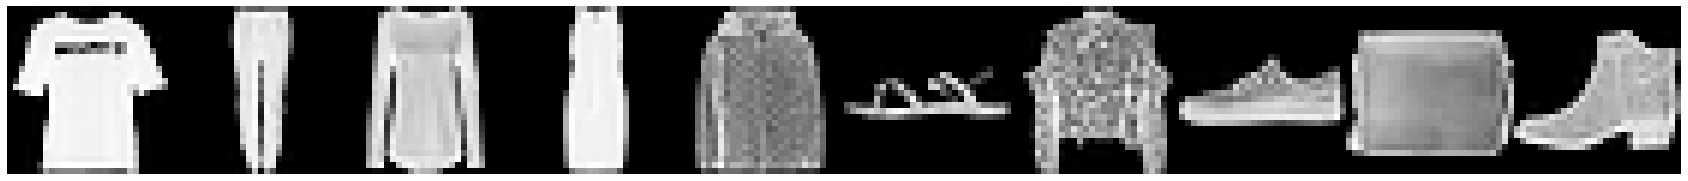

In [16]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])  

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)  

# Создание поля для изображения
plt.figure(figsize=(30, 6))   

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')    

# Без сетки
plt.grid(False) 

# Без осей
plt.axis('off')  

# Вывод результата
plt.show() 

In [17]:
# Изменение формы входных картинок с 28х28 на 784х1
print('Размерность ДО   ', x_train.shape)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)
print('Размерность ПОСЛЕ', x_train.shape, '\n')


# !!! Чтобы небыло переобучения, обязательно необходима нормализация данных!

# Нормализация из диапозона 0-255 в [-1,1]
# x_train = (x_train.astype('float32')-127.5)/127.5 # -- Например, для активационной функции 'tanh'

# Нормализация, из диапазона 1-255 в 0-1           
x_train= x_train.astype('float32')/255.
x_test= x_test.astype('float32')/255.
x_val = x_val.astype('float32')/255.


print('Размер x_train:', x_train.shape)
print('Размер y_train:', y_train.shape)
print('Размер x_test:', x_test.shape)
print('Размер y_test:', y_test.shape)
print('Размер x_val:', x_val.shape)
print('Размер y_val:', y_val.shape, '\n')

# Преобразование данных в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)  
y_test = utils.to_categorical(y_test, 10) 

# Проводим дополнительные проверки значений
print('Минимальное значение: ', np.min(x_val))
print('Максимальное значение: ', np.max(x_val))

Размерность ДО    (50000, 28, 28)
Размерность ПОСЛЕ (50000, 784) 

Размер x_train: (50000, 784)
Размер y_train: (50000,)
Размер x_test: (10000, 784)
Размер y_test: (10000,)
Размер x_val: (10000, 784)
Размер y_val: (10000,) 

Минимальное значение:  0.0
Максимальное значение:  1.0


In [19]:
def createModel(numN, drop, norm=False):

  # Создание последовательной модели
  model = Sequential() 

  if norm:
    model.add(BatchNormalization(input_shape=(x_train.shape[1], )))
    model.add(Dense(numN, activation="relu"))
  else:
    model.add(Dense(numN, input_dim=x_train.shape[1], activation="relu")) # Добавление полносвязного слоя на N нейронов с relu-активацией

  # model.add(Dense(100, activation="relu")) # Добавление полносвязного слоя на 100 нейронов с relu-активацией  
  model.add(Dropout(drop))
  model.add(Dense(10, activation="softmax")) # Добавление полносвязного слоя на 10 нейронов с softmax-активацией

  # Компиляция модели
  model.compile(loss="categorical_crossentropy", 
                optimizer="adam", 
                metrics=["accuracy"])

  return model

In [20]:
model_test = createModel(64, 0.1, True)

model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 54,026
Trainable params: 52,458
Non-trainable params: 1,568
_________________________________________________________________


In [11]:
dense_list = [200, 400, 600] # кол-во нейронов во входном слое
drop_list = [0, 0.1, 0.2, 0.4] # доля отключаемых нейронов
norm_list = [True, False] # Будем использовать BatchNormalization? 

parameters = []
histories = []

Параметры модели dense:200 drop:0
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5220 - accuracy: 0.8180 - val_loss: 0.4312 - val_accuracy: 0.8461
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3718 - accuracy: 0.8648 - val_loss: 0.3862 - val_accuracy: 0.8599
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3309 - accuracy: 0.8787 - val_loss: 0.3714 - val_accuracy: 0.8698
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3066 - accuracy: 0.8875 - val_loss: 0.3584 - val_accuracy: 0.8705
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2894 - accuracy: 0.8934 - val_loss: 0.3457 - val_accuracy: 0.8769
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2732 - accuracy: 0.8990 - val_loss: 0.3418 - val_accuracy: 0.8764
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2629 - accuracy: 0.9024 - val_loss: 0.

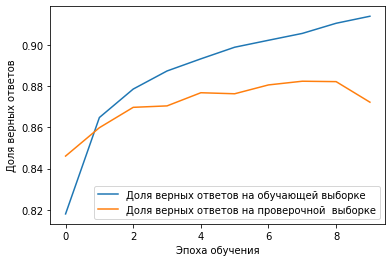

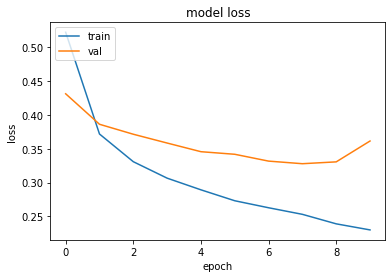

313/313 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8723
Точность на тестовой выборке: 0.8723000288009644
Параметры модели dense:200 drop:0.1
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5378 - accuracy: 0.8120 - val_loss: 0.4437 - val_accuracy: 0.8409
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3801 - accuracy: 0.8626 - val_loss: 0.3839 - val_accuracy: 0.8611
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3377 - accuracy: 0.8773 - val_loss: 0.3645 - val_accuracy: 0.8713
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3129 - accuracy: 0.8855 - val_loss: 0.3580 - val_accuracy: 0.8682
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2965 - accuracy: 0.8906 - val_loss: 0.3582 - val_accuracy: 0.8730
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2817 - accuracy: 0.8961 - val_loss: 0.35

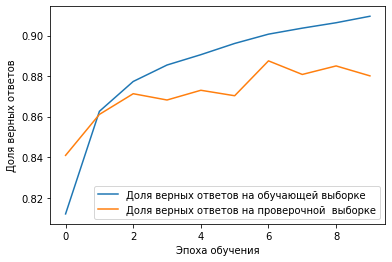

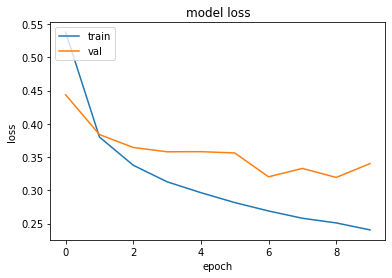

313/313 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8801
Точность на тестовой выборке: 0.8801000118255615
Параметры модели dense:200 drop:0.2
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5595 - accuracy: 0.8039 - val_loss: 0.4234 - val_accuracy: 0.8509
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3885 - accuracy: 0.8595 - val_loss: 0.3903 - val_accuracy: 0.8603
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3500 - accuracy: 0.8725 - val_loss: 0.3602 - val_accuracy: 0.8710
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3248 - accuracy: 0.8824 - val_loss: 0.3573 - val_accuracy: 0.8701
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3046 - accuracy: 0.8884 - val_loss: 0.3447 - val_accuracy: 0.8781
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2890 - accuracy: 0.8926 - val_loss: 0.35

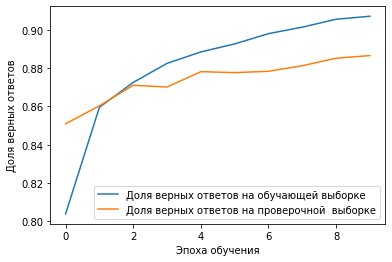

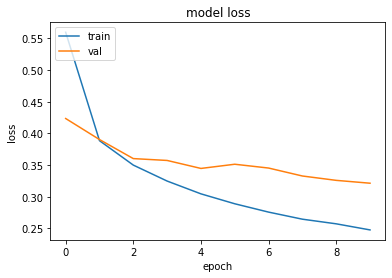

313/313 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.8865
Точность на тестовой выборке: 0.8865000009536743
Параметры модели dense:200 drop:0.4
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6214 - accuracy: 0.7814 - val_loss: 0.4390 - val_accuracy: 0.8429
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4264 - accuracy: 0.8497 - val_loss: 0.4111 - val_accuracy: 0.8483
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3783 - accuracy: 0.8643 - val_loss: 0.3681 - val_accuracy: 0.8646
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3525 - accuracy: 0.8736 - val_loss: 0.3693 - val_accuracy: 0.8654
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3323 - accuracy: 0.8795 - val_loss: 0.3443 - val_accuracy: 0.8747
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3168 - accuracy: 0.8849 - val_loss: 0.35

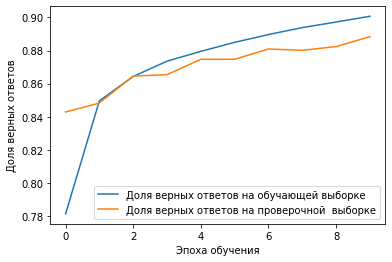

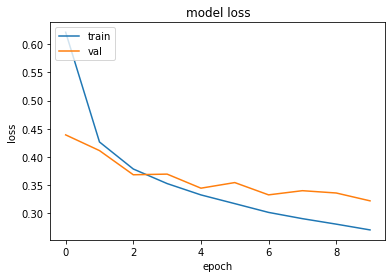

313/313 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8883
Точность на тестовой выборке: 0.8883000016212463
Параметры модели dense:400 drop:0
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5035 - accuracy: 0.8209 - val_loss: 0.4262 - val_accuracy: 0.8448
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3663 - accuracy: 0.8673 - val_loss: 0.3816 - val_accuracy: 0.8643
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3243 - accuracy: 0.8803 - val_loss: 0.3657 - val_accuracy: 0.8693
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3040 - accuracy: 0.8877 - val_loss: 0.3468 - val_accuracy: 0.8769
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2831 - accuracy: 0.8955 - val_loss: 0.3610 - val_accuracy: 0.8679
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2684 - accuracy: 0.9001 - val_loss: 0.3513

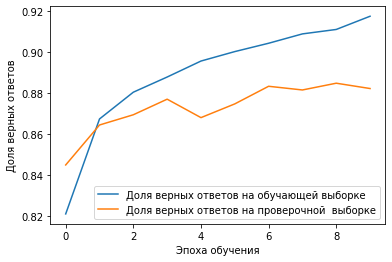

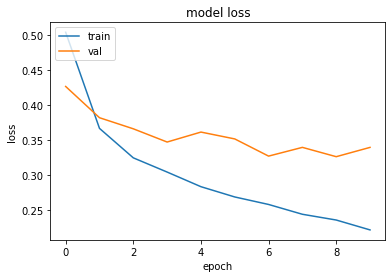

313/313 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8821
Точность на тестовой выборке: 0.882099986076355
Параметры модели dense:400 drop:0.1
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5171 - accuracy: 0.8166 - val_loss: 0.4313 - val_accuracy: 0.8435
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3709 - accuracy: 0.8657 - val_loss: 0.4162 - val_accuracy: 0.8505
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3287 - accuracy: 0.8785 - val_loss: 0.3757 - val_accuracy: 0.8581
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3068 - accuracy: 0.8878 - val_loss: 0.3692 - val_accuracy: 0.8648
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2878 - accuracy: 0.8928 - val_loss: 0.3364 - val_accuracy: 0.8785
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2758 - accuracy: 0.8967 - val_loss: 0.349

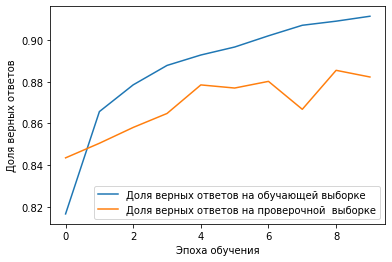

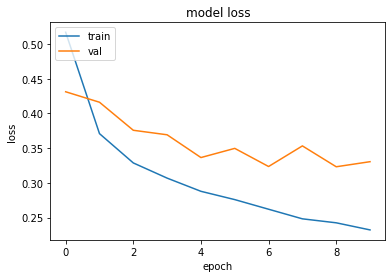

313/313 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8823
Точность на тестовой выборке: 0.8823000192642212
Параметры модели dense:400 drop:0.2
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5414 - accuracy: 0.8097 - val_loss: 0.4273 - val_accuracy: 0.8468
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3845 - accuracy: 0.8605 - val_loss: 0.3865 - val_accuracy: 0.8575
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.8725 - val_loss: 0.3642 - val_accuracy: 0.8724
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3169 - accuracy: 0.8838 - val_loss: 0.3586 - val_accuracy: 0.8697
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2972 - accuracy: 0.8908 - val_loss: 0.3374 - val_accuracy: 0.8759
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2842 - accuracy: 0.8949 - val_loss: 0.33

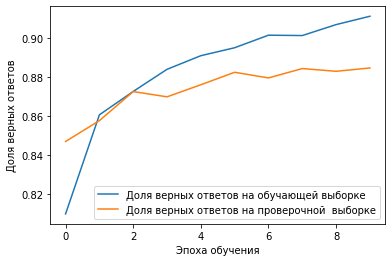

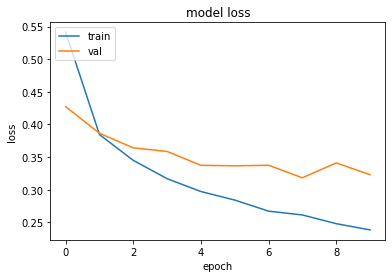

313/313 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8845
Точность на тестовой выборке: 0.8845000267028809
Параметры модели dense:400 drop:0.4
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6027 - accuracy: 0.7904 - val_loss: 0.4611 - val_accuracy: 0.8364
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4133 - accuracy: 0.8525 - val_loss: 0.3748 - val_accuracy: 0.8644
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3651 - accuracy: 0.8682 - val_loss: 0.3846 - val_accuracy: 0.8598
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3401 - accuracy: 0.8767 - val_loss: 0.3560 - val_accuracy: 0.8691
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3221 - accuracy: 0.8827 - val_loss: 0.3450 - val_accuracy: 0.8756
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3021 - accuracy: 0.8894 - val_loss: 0.36

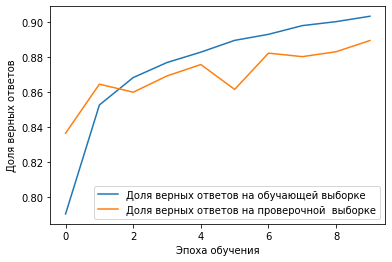

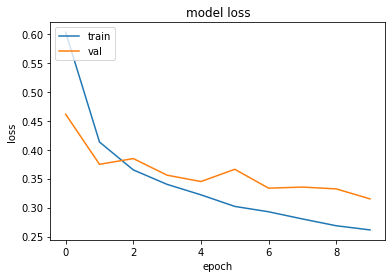

313/313 [==============================] - 1s 3ms/step - loss: 0.3151 - accuracy: 0.8893
Точность на тестовой выборке: 0.8892999887466431
Параметры модели dense:600 drop:0
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4931 - accuracy: 0.8244 - val_loss: 0.4885 - val_accuracy: 0.7962
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3549 - accuracy: 0.8699 - val_loss: 0.3806 - val_accuracy: 0.8616
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3188 - accuracy: 0.8824 - val_loss: 0.3561 - val_accuracy: 0.8720
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2934 - accuracy: 0.8912 - val_loss: 0.3463 - val_accuracy: 0.8740
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2788 - accuracy: 0.8962 - val_loss: 0.3408 - val_accuracy: 0.8748
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2640 - accuracy: 0.9010 - val_loss: 0.3159

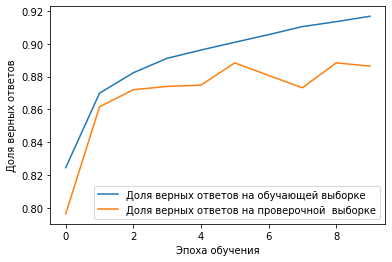

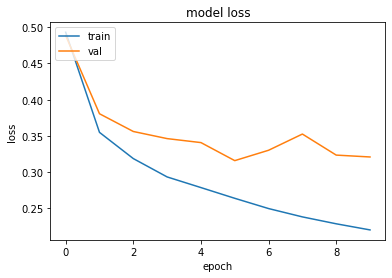

313/313 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8864
Точность на тестовой выборке: 0.8863999843597412
Параметры модели dense:600 drop:0.1
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5217 - accuracy: 0.8153 - val_loss: 0.4438 - val_accuracy: 0.8353
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3696 - accuracy: 0.8649 - val_loss: 0.3960 - val_accuracy: 0.8588
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3332 - accuracy: 0.8772 - val_loss: 0.3504 - val_accuracy: 0.8730
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3049 - accuracy: 0.8878 - val_loss: 0.3444 - val_accuracy: 0.8744
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2905 - accuracy: 0.8927 - val_loss: 0.3375 - val_accuracy: 0.8791
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2727 - accuracy: 0.8981 - val_loss: 0.34

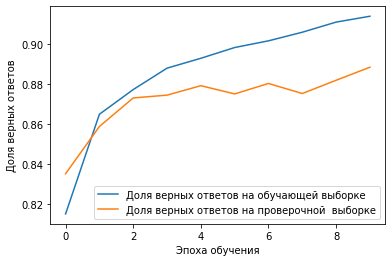

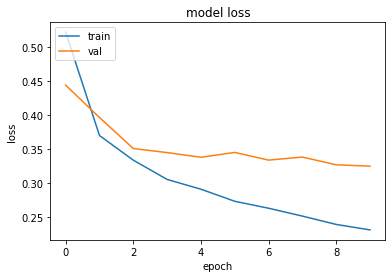

313/313 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8883
Точность на тестовой выборке: 0.8883000016212463
Параметры модели dense:600 drop:0.2
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5366 - accuracy: 0.8098 - val_loss: 0.4421 - val_accuracy: 0.8346
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3823 - accuracy: 0.8602 - val_loss: 0.3887 - val_accuracy: 0.8583
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3395 - accuracy: 0.8758 - val_loss: 0.4077 - val_accuracy: 0.8544
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3123 - accuracy: 0.8853 - val_loss: 0.3596 - val_accuracy: 0.8702
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2969 - accuracy: 0.8899 - val_loss: 0.3326 - val_accuracy: 0.8777
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2792 - accuracy: 0.8961 - val_loss: 0.33

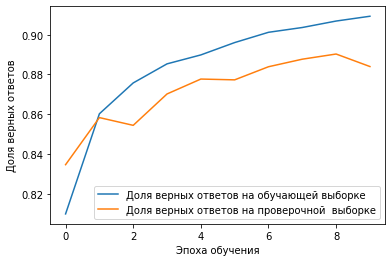

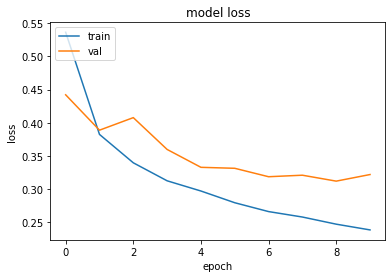

313/313 [==============================] - 1s 3ms/step - loss: 0.3218 - accuracy: 0.8840
Точность на тестовой выборке: 0.8840000033378601
Параметры модели dense:600 drop:0.4
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5765 - accuracy: 0.7975 - val_loss: 0.4362 - val_accuracy: 0.8357
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3981 - accuracy: 0.8579 - val_loss: 0.3782 - val_accuracy: 0.8640
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3590 - accuracy: 0.8706 - val_loss: 0.3619 - val_accuracy: 0.8722
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3342 - accuracy: 0.8791 - val_loss: 0.3538 - val_accuracy: 0.8718
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3167 - accuracy: 0.8839 - val_loss: 0.3482 - val_accuracy: 0.8723
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2974 - accuracy: 0.8900 - val_loss: 0.33

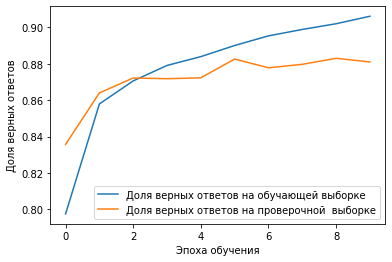

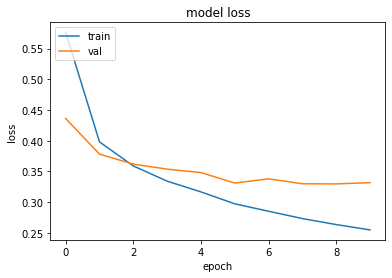

313/313 [==============================] - 1s 3ms/step - loss: 0.3318 - accuracy: 0.8810
Точность на тестовой выборке: 0.8809999823570251
[('Параметры модели :', 200, 0, 0.8723000288009644), ('Параметры модели :', 200, 0.1, 0.8801000118255615), ('Параметры модели :', 200, 0.2, 0.8865000009536743), ('Параметры модели :', 200, 0.4, 0.8883000016212463), ('Параметры модели :', 400, 0, 0.882099986076355), ('Параметры модели :', 400, 0.1, 0.8823000192642212), ('Параметры модели :', 400, 0.2, 0.8845000267028809), ('Параметры модели :', 400, 0.4, 0.8892999887466431), ('Параметры модели :', 600, 0, 0.8863999843597412), ('Параметры модели :', 600, 0.1, 0.8883000016212463), ('Параметры модели :', 600, 0.2, 0.8840000033378601), ('Параметры модели :', 600, 0.4, 0.8809999823570251)]


In [12]:
for dense in dense_list:
  for norm in norm_list:
    for drop in drop_list:

      print(f'Параметры модели Dense:{dense} Drop:{drop} Normalisation:{norm}')

      # Создаем Sequential model по параметрам
      model = createModel(dense, drop, norm=norm)

      # Обучение модели и сохранение истории
      history = model.fit( 
                  x_train,
                  y_train,
                  batch_size=128,
                  epochs=20,
                  validation_split=(x_val,y_val),
                  verbose=1
                )
      
      scores = model.evaluate(x_test, y_test)
      print('Точность на тестовой выборке:', scores[1] )

      parameters.append((f'Параметры модели. Dense: {dense} DropOut: {drop} Normalisation?: {norm}', drop, norm, round(scores[0], 4), round(scores[1], 4) * 100))
      histories.append(history)

print(parameters)

In [21]:
def plot_chart(index_exp, score, loss, history, model_params):
  plt.figure(1, figsize=(20, 5))

  # График - Доля верных ответов
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Доля верных ответов (train)')
  plt.scatter(19, score/100, c='r')
  plt.plot(history.history['val_accuracy'], label='Доля верных ответов (valuation)')
  plt.title(f'Опыт №{index_exp}: Параметры модели: {model_params}')
  plt.xlable('Эпоха обучения')
  plt.ylable('Доля верных ответов')
  plt.grid(color='gray', linestyle=':')
  plt.legend()

  # График - Доля ошибок
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Доля ошибок (train)')
  plt.scatter(19, loss/100, c='r')
  plt.plot(history.history['val_loss'], label='Доля ошибок (valuation)')
  plt.title(f'Опыт №{index_exp}: Доля ошибок')
  plt.xlable('Эпоха обучения')
  plt.ylable('Ошибка')
  plt.grid(color='gray', linestyle=':')
  plt.legend()

  print()
  plt.show()

In [16]:
df = pd.DataFrame (parameters, columns = ['Title', 'Число нейронов', 'Значение Dropout', 'Нормализация?', 'Loss(test)', 'Accuraccy(test)'])
df.sort_values(by='Accuraccy(test)', ascending=False, inplace=True)
df

,Title,Dense,Drop out,Result
7,Параметры модели :,400,0.4,0.8893
3,Параметры модели :,200,0.4,0.8883
9,Параметры модели :,600,0.1,0.8883
2,Параметры модели :,200,0.2,0.8865
8,Параметры модели :,600,0.0,0.8864
6,Параметры модели :,400,0.2,0.8845
10,Параметры модели :,600,0.2,0.8840
5,Параметры модели :,400,0.1,0.8823
4,Параметры модели :,400,0.0,0.8821
11,Параметры модели :,600,0.4,0.8810


Эксперименты показали, что при количестве нейронов 400 во входном слое и отключении 40% нейронов точность при данной архитектуре достигает 88.93%

In [ ]:
for index_exp in range(len(parameters)):
  params = parameters[index_exp]
  plot_chart(index_exp, params[len(params)-1], params[len(params)-2], histories[index_exp], params[0])

# Проверяем работу нейронки

In [14]:
# Предсказание тестовой выборки
prediction = model.predict(x_test) 

# Предсказание на материале случайного изображения из базы
n = np.random.randint(0, 100)        
print('Предсказание ', np.argmax(prediction[n]))
print('Правильный ответ', np.argmax(y_test[n]))

Предсказание  7
Правильный ответ 7
